In [1]:
%pylab nbagg
import torch
import numpy as np
from lib.Simulator.Wrapper import *
from lib.utils import *
from numpy import array as ar
from copy import deepcopy as dcp
import numpy as np
from matplotlib import rc
import matplotlib as mpl
import multiprocessing
from multiprocessing import Pool
from lib.Simulator.connectivity_paths import connectivity_source_file
rc('text',usetex = True)
mpl.rcParams['font.size'] = 10
torch.set_printoptions(sci_mode=True)
try:
    multiprocessing.set_start_method('spawn')
except:
    pass
def paral_sim(s, ind,processes = 1):
    if processes > 10:
        processes = 10
    if __name__ == '__main__':
        with Pool(processes=processes) as pool:
            results = pool.map_async(s.run_simulation_long,ind).get(timeout=600000)                
        pool.close()
        pool.join()
    return results
sc = connectivity.Connectivity.from_file(connectivity_source_file)
SC_scaled = sc.weights* ((np.ones((68,68)) - np.eye(68)))
SC_scaled /= np.max(SC_scaled)
par_val_def = torch.cat([theta_initial.view(1,-1) for i in range(68)], dim = 0)
par_val_def_denoise = torch.cat([theta_initial.view(1,-1) for i in range(68)], dim = 0)
par_val_def_denoise[:,-1] = 0
par_val_def_denoise[:,-2] = 0
print(par_val_def.shape)

Populating the interactive namespace from numpy and matplotlib
torch.Size([68, 24])


In [2]:
wrapper = Wrapper()
speed_vals = [[10*i,f'Coupled{i} (a:{str(4e-4)[:6]}, K: {10*i})'] for i in range(1,11)]
#a_vals.reverse()
wrapper.add_sim(par_val_def_denoise,file = 'empty', a_val = 0, speed = 20)
for i in range(len(speed_vals)):
    wrapper.add_sim(par_val_def_denoise, a_val = 4e-4, speed = speed_vals[i][0]) 

In [3]:
results = paral_sim(wrapper, [i for i in range(len(wrapper.simulations))],processes = len(wrapper.simulations))
psd = torch.cat([results[i][1][:,4:100].view((1,68,-1)) for i in range(len(results))],dim=0)

(11, 68, 68)


<IPython.core.display.Javascript object>


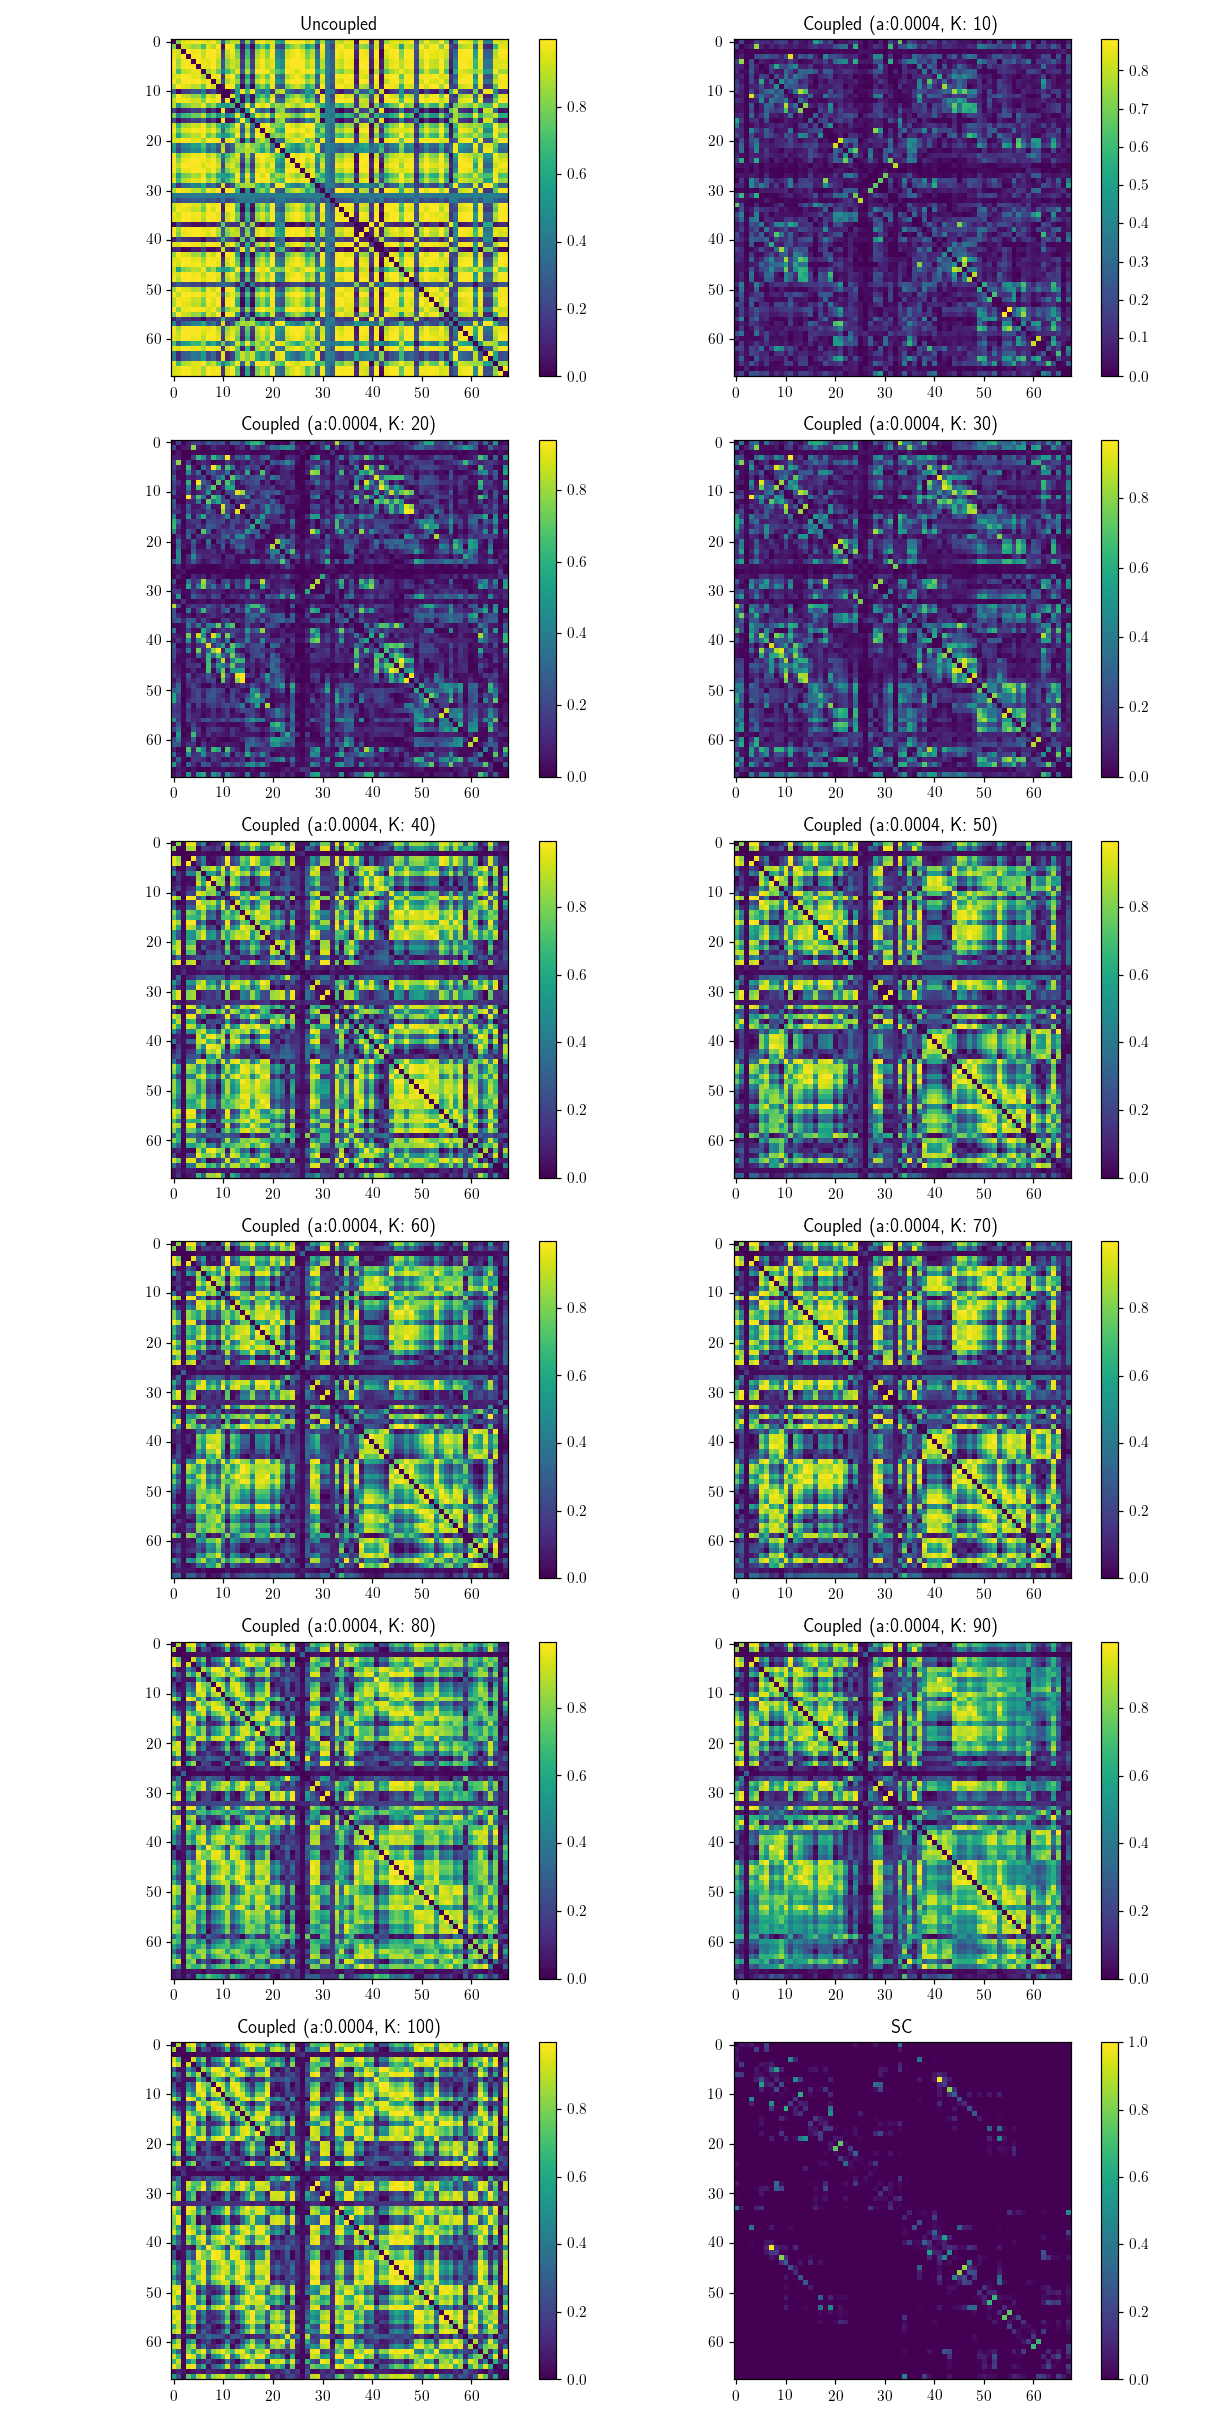

In [4]:
num_sims = len(wrapper.simulations)
connectome = np.zeros((num_sims,68,68))
for i in range(num_sims):
    connectome[i] =  np.corrcoef(results[i][0])*(np.ones((68,68)) - np.eye(68))
print(connectome.shape)
conn_titles = ['Uncoupled']
for i in range(len(speed_vals)):
    conn_titles.append(speed_vals[i][1])
figure(figsize=(11,num_sims*2))
for i in range(num_sims):
    subplot(int(num_sims/2)+1,2,i+1)
    imshow(abs(connectome[i]))
    colorbar()
    title(conn_titles[i])
subplot(int(num_sims/2)+1,2,i+2)
imshow(SC_scaled)
colorbar()
title('SC')
tight_layout()

<IPython.core.display.Javascript object>


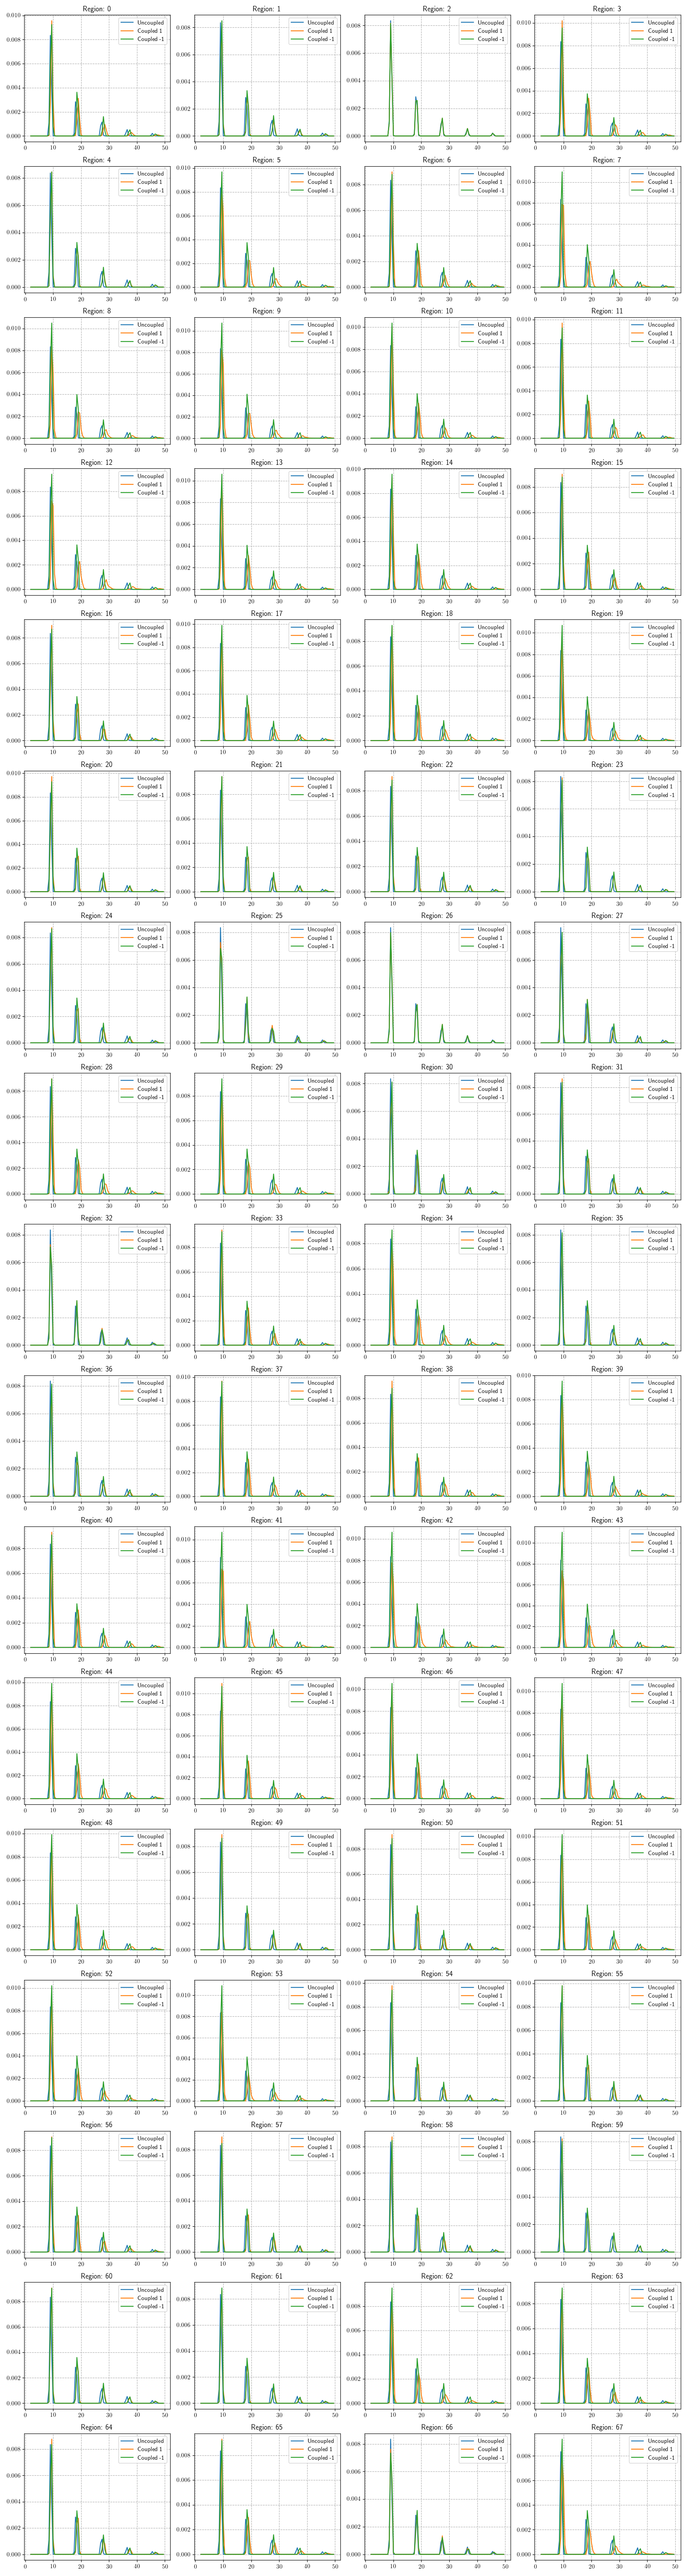

In [7]:
PSD_show = True
plot_psd = [0,1,-1]
if PSD_show:
    freqs = [0.5*i for i in range(4,100)]
    figure(figsize=(16,60))
    counter = 0
    for i in range(68):
        counter+=1
        subplot(17,4,counter)
        plot(freqs,psd[plot_psd[0],i,:96],label = f'Uncoupled',linestyle = '-')
        plot(freqs,psd[plot_psd[1],i,:96],label = f'Coupled {plot_psd[1]}',linestyle = '-')
        plot(freqs,psd[plot_psd[2],i,:96],label = f'Coupled {plot_psd[2]}',linestyle = '-')
        #xlim([1,40])
        legend(loc = 'upper right')
        title(f"Region: {i}")
        grid(linestyle = '--')
    tight_layout()
    show()

<IPython.core.display.Javascript object>


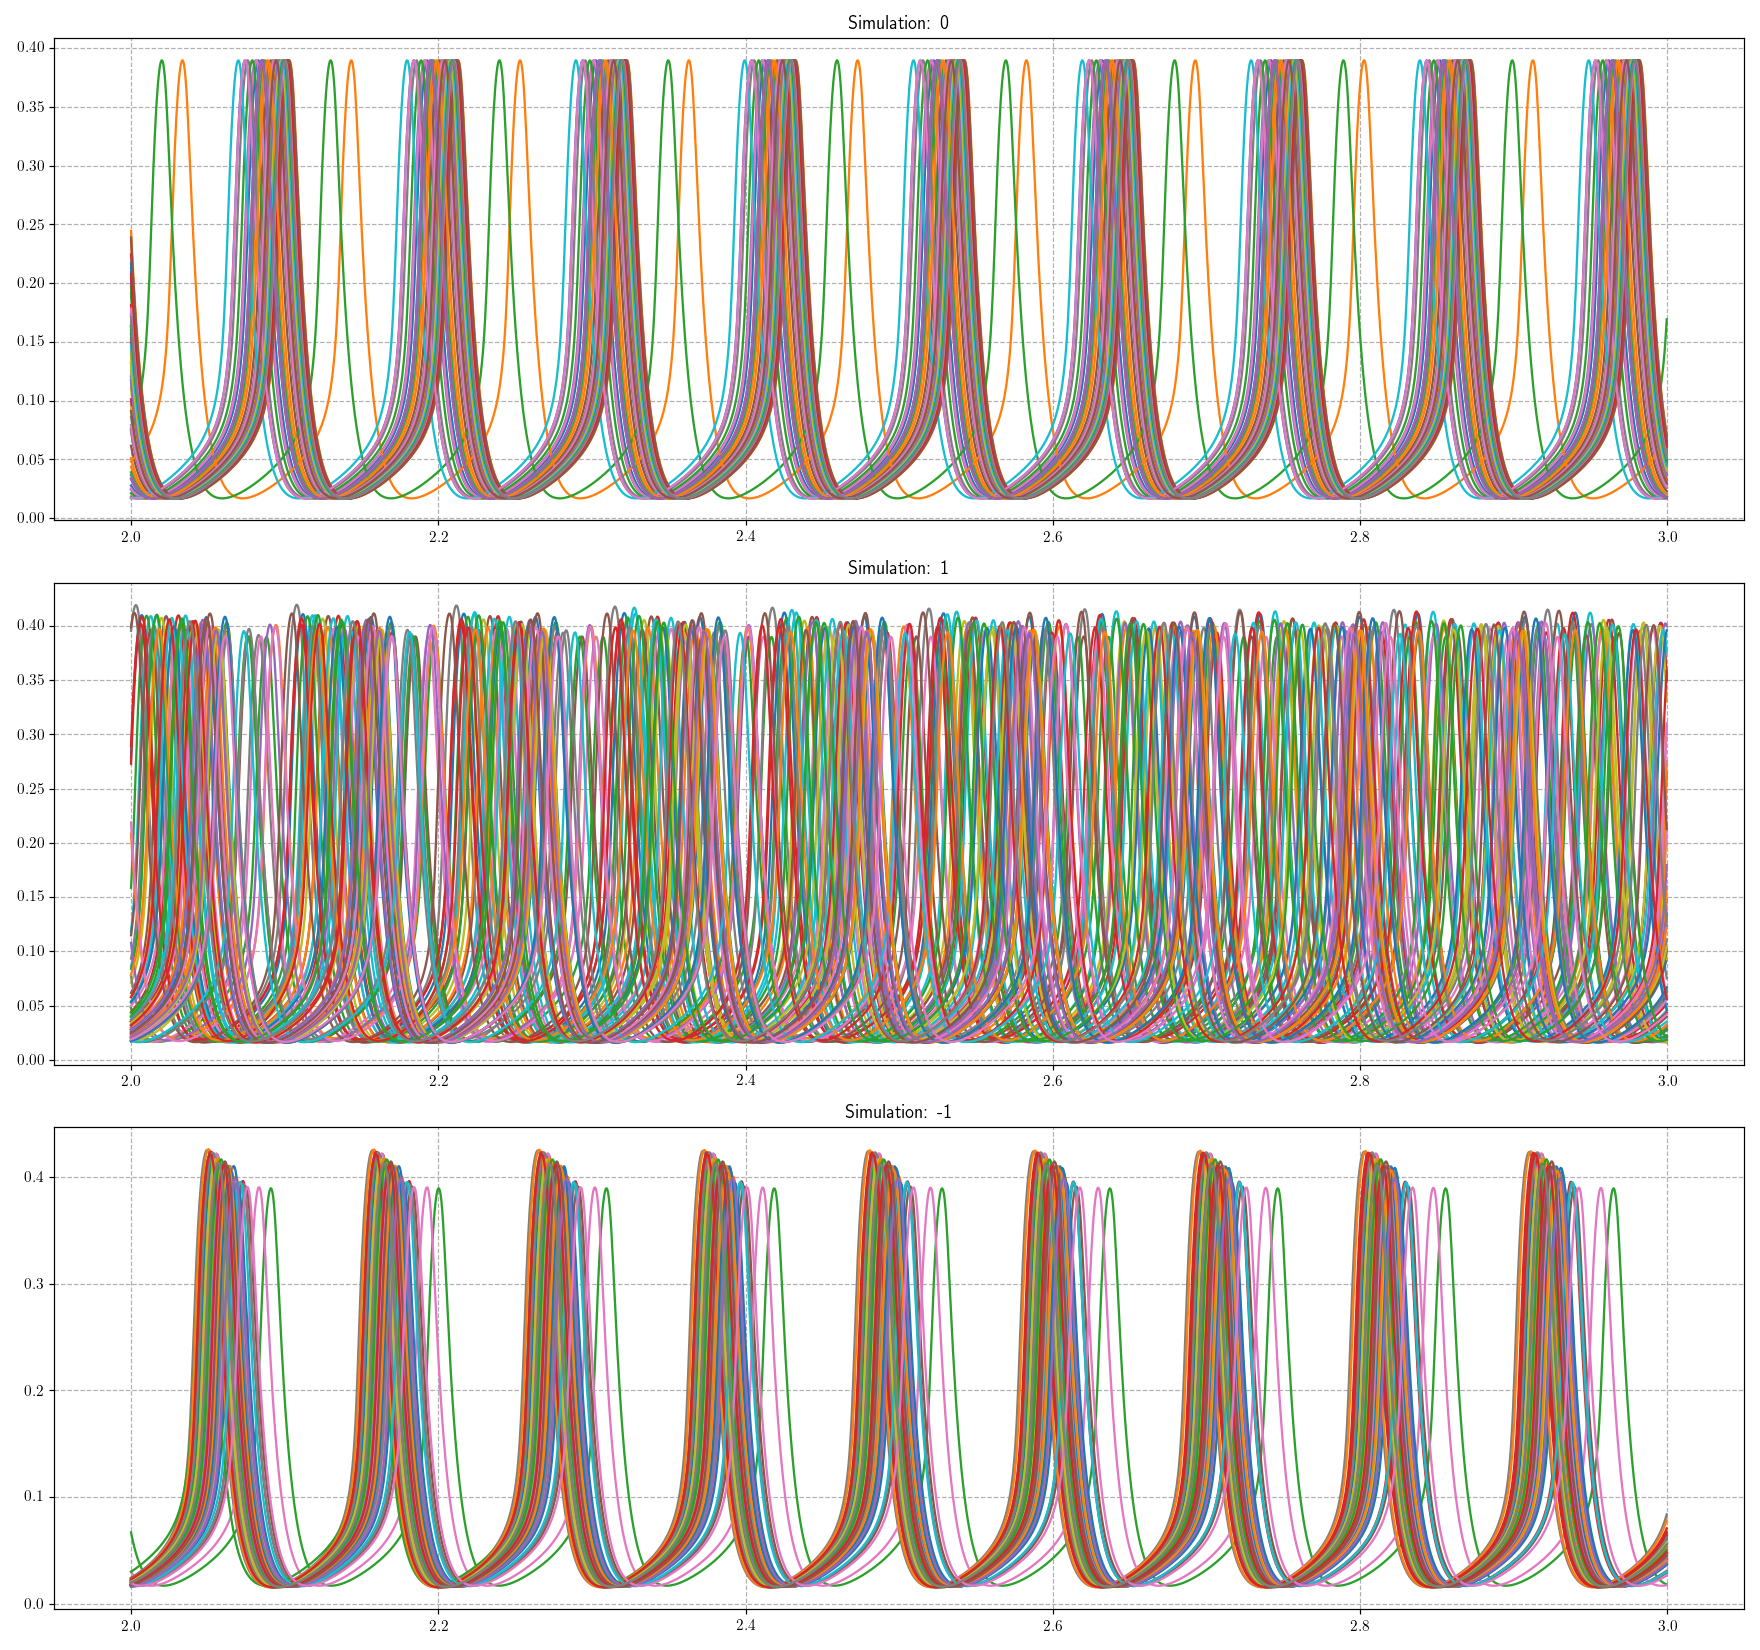

In [6]:
ts_show = True
plot_ts = [0,1,-1]
if ts_show:
    t = [5e-4*j for j in range(4000,6000)]
    figure(figsize=(16,15))
    for i in range(3):
        subplot(3,1,i+1)
        for j in range(68):
            plot(t,results[plot_ts[i]][0][j,4000:6000])
        title(f"Simulation: {plot_ts[i]}")
    
        grid(linestyle = '--')
    tight_layout()
    show()

In [8]:
wrapper = Wrapper()
speed_vals = [[10*i,f'Coupled{i} (a:{str(4e-4)[:6]}, K: {10*i})'] for i in range(1,11)]
#a_vals.reverse()
wrapper.add_sim(par_val_def,file = 'empty', a_val = 0, speed = 20)
for i in range(len(speed_vals)):
    wrapper.add_sim(par_val_def, a_val = 4e-4, speed = speed_vals[i][0]) 

In [ ]:
results = paral_sim(wrapper, [i for i in range(len(wrapper.simulations))],processes = len(wrapper.simulations))
psd = torch.cat([results[i][1][:,4:100].view((1,68,-1)) for i in range(len(results))],dim=0)

In [ ]:
num_sims = len(wrapper.simulations)
connectome = np.zeros((num_sims,68,68))
for i in range(num_sims):
    connectome[i] =  np.corrcoef(results[i][0])*(np.ones((68,68)) - np.eye(68))
print(connectome.shape)
conn_titles = ['Uncoupled']
for i in range(len(speed_vals)):
    conn_titles.append(speed_vals[i][1])
figure(figsize=(11,num_sims*2))
for i in range(num_sims):
    subplot(int(num_sims/2)+1,2,i+1)
    imshow(abs(connectome[i]))
    colorbar()
    title(conn_titles[i])
subplot(int(num_sims/2)+1,2,i+2)
imshow(SC_scaled)
colorbar()
title('SC')
tight_layout()

In [ ]:
PSD_show = True
plot_psd = [0,4,5]
if PSD_show:
    freqs = [0.5*i for i in range(4,100)]
    figure(figsize=(16,60))
    counter = 0
    for i in range(68):
        counter+=1
        subplot(17,4,counter)
        plot(freqs,psd[plot_psd[0],i,:96],label = f'Uncoupled',linestyle = '-')
        plot(freqs,psd[plot_psd[1],i,:96],label = f'Coupled {plot_psd[1]}',linestyle = '-')
        plot(freqs,psd[plot_psd[2],i,:96],label = f'Coupled {plot_psd[2]}',linestyle = '-')
        #xlim([1,40])
        legend(loc = 'upper right')
        title(f"Region: {i}")
        grid(linestyle = '--')
    tight_layout()
    show()

In [ ]:
ts_show = True
plot_ts = [0,1,-1]
if ts_show:
    t = [5e-4*j for j in range(4000,5000)]
    figure(figsize=(16,15))
    for i in range(3):
        subplot(3,1,i+1)
        for j in range(68):
            plot(t,results[plot_ts[i]][0][j,4000:5000])
        title(f"Simulation: {plot_ts[i]}")
    
        grid(linestyle = '--')
    tight_layout()
    show()